# Logistic Regression

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd

## Importing the dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sohanjs111/Machine-Learning/main/Database/Social_Network_Ads.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Visualizing the dataset

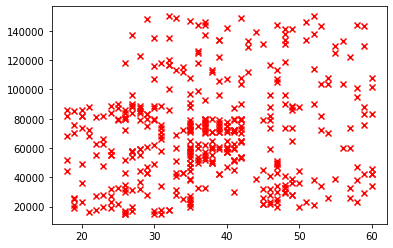

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.Age,df.EstimatedSalary, marker="x", c="r")

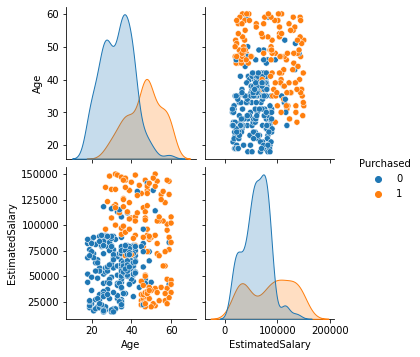

In [6]:
import seaborn as sns
sns.pairplot(data=df,hue= "Purchased")

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 2)
(120, 2)
(280,)
(120,)


## Feature Scaling

In [8]:
from sklearn import preprocessing
Std = preprocessing.StandardScaler()
model = Std.fit_transform(X,y)
model

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

## Training the Logistic Regression model on the Training set

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train, y_train)

0.6607142857142857

# Accuracy on train data

In [10]:
from sklearn.metrics import accuracy_score

X_train_prediction = lr.predict(X_train)
X_test_data_accuracy = accuracy_score(X_train_prediction, y_train)
X_test_data_accuracy

0.6607142857142857

# Accuracy on test data

In [11]:
X_test_prediction = lr.predict(X_test)
X_test_data_accuracy = accuracy_score(X_test_prediction, y_test)
X_test_data_accuracy

0.6

## Predicting a new result


In [12]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Comparing the test values with predicted values

In [13]:
data=pd.DataFrame({'Real_values': y_test, 'Predicted_values' : y_pred})
data

,Real_values,Predicted_values
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
115,0,0
116,0,0
117,0,0
118,0,0


## Predicting the Test set results

In [14]:
df2= pd.DataFrame(data=y_test)
df2

,0
0,0
1,0
2,1
3,1
4,0
...,...
115,0
116,0
117,0
118,0


## Making the Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
pd.DataFrame(data=cm)

,0,1
0,72,0
1,48,0


## Visualising the Training set results

In [16]:
print(X_train.shape, X_train.size)
print(y_train.shape , y_train.size)

(280, 2) 560
(280,) 280


In [17]:
print(X_train)

[[    27  31000]
 [    35  71000]
 [    49  28000]
 [    35  91000]
 [    37  75000]
 [    32 117000]
 [    36  75000]
 [    20  86000]
 [    38  50000]
 [    49  36000]
 [    40  65000]
 [    37  77000]
 [    60  46000]
 [    48 138000]
 [    40  71000]
 [    36  63000]
 [    26  81000]
 [    33  31000]
 [    41  51000]
 [    46  74000]
 [    18  82000]
 [    37  33000]
 [    35  53000]
 [    28  59000]
 [    37  71000]
 [    18  44000]
 [    38  61000]
 [    35  65000]
 [    31  66000]
 [    47  25000]
 [    42 104000]
 [    19  19000]
 [    21  72000]
 [    28  32000]
 [    52 150000]
 [    53 104000]
 [    25  80000]
 [    26  72000]
 [    26  15000]
 [    40 142000]
 [    35  38000]
 [    57 122000]
 [    41  87000]
 [    24  89000]
 [    37  52000]
 [    35 108000]
 [    32 100000]
 [    35 147000]
 [    19  26000]
 [    46  82000]
 [    47 105000]
 [    45  45000]
 [    38  51000]
 [    37  93000]
 [    29  43000]
 [    41  30000]
 [    40  60000]
 [    27  88000]
 [    27  9000

ValueError: x and y must be the same size

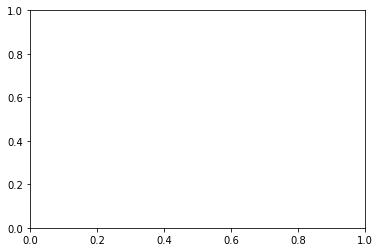

In [18]:
#X_train.reshape(1:-1)
train_pred = lr.predict(X_train)
plt.scatter(X_train, y_train)                #Plot the datapoints
plt.plot(X_train, train_pred,color='black')         #plots the model prediction
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Training set')

## Visualising the Test set results

ValueError: x and y must be the same size

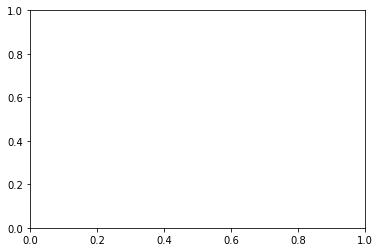

In [22]:

train_pred = lr.predict(X_test)
plt.scatter(X_train, y_train)                #Plot the datapoints
plt.plot(X_train, train_pred,color='black')         #plots the model prediction
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Training set')